In [15]:
import tweepy
import pandas as pd
import numpy as np
import json
import re
import warnings
warnings.filterwarnings('ignore')

### Establishing the connection
Created and Application in Twitter Developer account as Assessed-task-2 & copied the keyboard.

In [16]:
# Application creds made in developer account ...

consumer_key = 'jIXCU53opEikJKYRWK633SRTd'
consumer_key_secret = 'NTx4NDFUfJMuAZwg7DX4kRW7ZMpWUYUe8ZXi7fH8C5jWHhn4UZ'
access_token = '1371716702-hRzyepHlBcKVTvhI0W6Npdd7p78GjHEZb4w9v0y'
access_token_secret = 'JdvZubB0HLeqRY7qJLZ7oFZH2q9R2BPInDZ30TVEWnM7q'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
# Authorisation of API key and API key secret.
auth.set_access_token(access_token, access_token_secret)
# Set access to user's access token and access token secret.
api = tweepy.API(auth)
# The API class provides access to the Twitter RESTful API method.

### Testing the connection

In [17]:
# Testing the authentication.
try:
    user = api.verify_credentials()
    print('Authentication OK.')
except:
    print('Error during authentication.')


Authentication OK.


## Task 1
Collect 400 tweets from two different Twitter users **(Australian politicians)**, 200 from each.  You should try to find two politicians where you would expect there to be some noticeable differences in their tweets.

**Selected politician for the Assessments:**<br>
Malcolm Turnbull with Screen name: @TurnbullMalcolm    *-Former PM of Australia. (2014-2018)*<br>
Kevin Rudd with Screen name: @MrKRudd      -* Former PM of Australia.*

#### Collecting first 200 tweets of Malcolm Turnbull with Screen name: @TurnbullMalcolm 

In [18]:
max_tweets = 200
screen_name = '@TurnbullMalcolm'
tweets_Malcolm = api.user_timeline(screen_name = screen_name, tweet_mode = 'extended', count = max_tweets)

In [19]:
Malcolm = []
for tweet in tweets_Malcolm:
    Malcolm.append(tweet._json)

with open('Data_scrapped/TurnbullMalcolm.json', mode = 'w') as file:
    file.write(json.dumps(Malcolm , indent = 4))

#### Collecting first 200 tweets of Malcolm Turnbull with Screen name: @TurnbullMalcolm 

In [20]:
max_tweets = 200
screen_name = '@MrKRudd'
tweets_Rudd = api.user_timeline(screen_name = screen_name,tweet_mode = 'extended', count = max_tweets)

In [21]:
Rudd = []
for tweet in tweets_Rudd:
    Rudd.append(tweet._json)
    
with open('Data_scrapped/MrKRudd.json', mode = 'w') as file:
    file.write(json.dumps(Rudd , indent = 4))

# Task 2
Use pandas to plot the posting times of the tweets for the two users in one bar chart; the aim of the plot is to distinguish the two users.

#### Creating listing for Malcolm

In [34]:
#listing the Malcolm Tweets and timings
Malcolm = []
with open('Data_scrapped/TurnbullMalcolm.json', encoding = 'utf-8', mode = 'r') as file:
        Malcolm_list = json.load(file)
        for dict in Malcolm_list:
             Malcolm.append({'user_id':str(dict['user']['name']),
                           'post_time':dict['created_at'],
                          'tweet':str(dict['full_text']),  
             })

In [35]:
Malcolm_df = pd.DataFrame(Malcolm , columns = ['user_id','post_time','tweet', ])
Malcolm_df.head(10)

user_id                       post_time  \
0  Malcolm Turnbull 💉💉  Tue Oct 12 03:08:32 +0000 2021   
1  Malcolm Turnbull 💉💉  Tue Oct 12 00:43:30 +0000 2021   
2  Malcolm Turnbull 💉💉  Tue Oct 12 00:38:13 +0000 2021   
3  Malcolm Turnbull 💉💉  Mon Oct 11 08:45:24 +0000 2021   
4  Malcolm Turnbull 💉💉  Sun Oct 10 22:26:23 +0000 2021   
5  Malcolm Turnbull 💉💉  Sun Oct 10 21:44:36 +0000 2021   
6  Malcolm Turnbull 💉💉  Sun Oct 10 05:46:22 +0000 2021   
7  Malcolm Turnbull 💉💉  Sun Oct 10 05:42:10 +0000 2021   
8  Malcolm Turnbull 💉💉  Sun Oct 10 05:41:08 +0000 2021   
9  Malcolm Turnbull 💉💉  Sun Oct 10 05:41:02 +0000 2021   

                                               tweet  
0  RT @alexbhturnbull: Chinese politics and your ...  
1  China singling out Australian coal is a sign o...  
2  @ChristineMilne @SmartEnergyCncl Absolutely! P...  
3  RT @franceinfo: Le nouvel album d'Astérix, "As...  
4  RT @DAlperovitch: Theory: The redacted country...  
5  RT @Matt_KeanMP: With NSW’s 50% emissions redu...  
6  RT @FortescueFuture: Today we partnered with t...  
7  RT @AnnastaciaMP: Gladstone is set to become Q...  
8  RT @FortescueFuture: Our goal is to become the...  
9  RT @FortescueFuture: Our manufacturing arm, st...

In [36]:
#checking only 200 rows are fetched here.
Malcolm_df.shape

(200, 3)

In [37]:
Malcolm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    200 non-null    object
 1   post_time  200 non-null    object
 2   tweet      200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [38]:
#Need to change the datatype further for plotting post time,Hour
Malcolm_df['post_time'] = pd.to_datetime(Malcolm_df['post_time'])
Malcolm_df['hour'] = Malcolm_df['post_time'].dt.hour

In [39]:
Malcolm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_id    200 non-null    object             
 1   post_time  200 non-null    datetime64[ns, UTC]
 2   tweet      200 non-null    object             
 3   hour       200 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 6.4+ KB


#### Creating lisitng for MrKRudd

In [40]:
#listing the Malcolm Tweets and timings
Rudd = []
with open('Data_scrapped/MrKRudd.json', encoding = 'utf-8', mode = 'r') as file:
        Rudd_list = json.load(file)
        for dict in Rudd_list:
             Rudd.append({'user_id':str(dict['user']['name']),
                           'post_time':dict['created_at'],
                          'tweet':str(dict['full_text']),  
             })

In [42]:
Rudd_df = pd.DataFrame(Rudd , columns = ['user_id','post_time','tweet', ])
Rudd_df.head(10)

user_id                       post_time  \
0  Kevin Rudd  Tue Oct 12 02:59:41 +0000 2021   
1  Kevin Rudd  Tue Oct 12 01:23:00 +0000 2021   
2  Kevin Rudd  Mon Oct 11 22:51:00 +0000 2021   
3  Kevin Rudd  Mon Oct 11 20:03:00 +0000 2021   
4  Kevin Rudd  Mon Oct 11 10:54:06 +0000 2021   
5  Kevin Rudd  Mon Oct 11 06:50:00 +0000 2021   
6  Kevin Rudd  Mon Oct 11 05:09:17 +0000 2021   
7  Kevin Rudd  Mon Oct 11 00:37:59 +0000 2021   
8  Kevin Rudd  Sun Oct 10 02:45:33 +0000 2021   
9  Kevin Rudd  Sun Oct 10 02:45:32 +0000 2021   

                                               tweet  
0  You know Morrison has really gone beyond the p...  
1  Murdoch is today predicting an investment bona...  
2  Murdoch now says that decarbonising the econom...  
3  Murdoch spent years working hand-in-glove with...  
4  Murdoch now says deploying green technology, l...  
5  Murdoch should crawl back into his crypt… How ...  
6  Murdoch is now drowning in greenwash, giving p...  
7  What a total bucket of greenwash from Murdoch,...  
8  Here’s a thread with some facts and figures ab...  
9  Breathtaking arrogance from the outgoing ABC n...

In [43]:
#checking only 200 rows are fetched here.
Rudd_df.shape

(200, 3)

In [44]:
Rudd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    200 non-null    object
 1   post_time  200 non-null    object
 2   tweet      200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [45]:
#Need to change the datatype further for plotting post time,Hour
Rudd_df['post_time'] = pd.to_datetime(Rudd_df['post_time'])
Rudd_df['hour'] = Rudd_df['post_time'].dt.hour

In [46]:
Rudd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_id    200 non-null    object             
 1   post_time  200 non-null    datetime64[ns, UTC]
 2   tweet      200 non-null    object             
 3   hour       200 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 6.4+ KB


### Listing Both Twitter Account to one table

In [47]:
df = pd.concat([Malcolm_df,Rudd_df], axis=0).reset_index()
df

index              user_id                 post_time  \
0        0  Malcolm Turnbull 💉💉 2021-10-12 03:08:32+00:00   
1        1  Malcolm Turnbull 💉💉 2021-10-12 00:43:30+00:00   
2        2  Malcolm Turnbull 💉💉 2021-10-12 00:38:13+00:00   
3        3  Malcolm Turnbull 💉💉 2021-10-11 08:45:24+00:00   
4        4  Malcolm Turnbull 💉💉 2021-10-10 22:26:23+00:00   
..     ...                  ...                       ...   
395    195           Kevin Rudd 2021-08-14 06:08:54+00:00   
396    196           Kevin Rudd 2021-08-14 03:37:14+00:00   
397    197           Kevin Rudd 2021-08-14 03:29:34+00:00   
398    198           Kevin Rudd 2021-08-14 01:56:40+00:00   
399    199           Kevin Rudd 2021-08-13 11:24:59+00:00   

                                                 tweet  hour  
0    RT @alexbhturnbull: Chinese politics and your ...     3  
1    China singling out Australian coal is a sign o...     0  
2    @ChristineMilne @SmartEnergyCncl Absolutely! P...     0  
3    RT @franceinfo: Le nouvel album d'Astérix, "As...     8  
4    RT @DAlperovitch: Theory: The redacted country...    22  
..                                                 ...   ...  
395  Any other state govt, had they been confronted...     6  
396  For people with vision impairment or low visio...     3  
397  The fall of Oruzgan to the Taliban, and the re...     3  
398  My piece in @satpaper on Murdoch’s four-stage ...     1  
399  An update for folks who aren't on the https://...    11  

[400 rows x 5 columns]

### Plotting the Graph

Text(0.5, 0, 'Time')

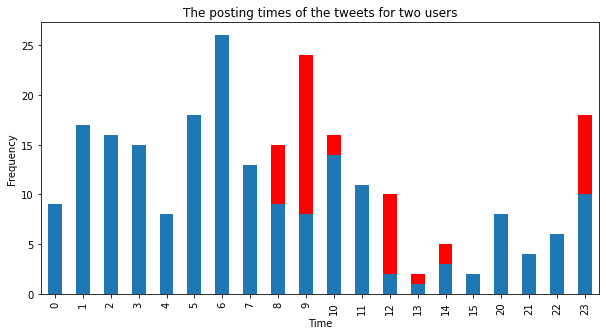

In [49]:
ax1 = Malcolm_df['hour'].value_counts().sort_index().plot.bar(figsize = (10, 5), color = 'red')
ax2 = Rudd_df['hour'].value_counts().sort_index().plot.bar(figsize = (10, 5))
ax1.set_title('The posting times of the tweets for two users')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Time')